# Libraries and Meeting with Data

In [118]:
#!pip install nltk

In [119]:
#!pip install langdetect

In [120]:
#!pip install stop_words

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from textblob import TextBlob
#her kelime pozitif veya negatif bir değer alır

#Dil tespit etmek için
from langdetect import detect

#Sentiment analiz yapmak için
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

#Bulut resmi için
import os
from PIL import Image

#NLP
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import sent_tokenize

from nltk.corpus import stopwords
from stop_words import get_stop_words
import re
#WordCloud
from wordcloud import WordCloud,STOPWORDS

#Machine learning
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score


from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report

In [122]:
#nltk.download('punkt')

In [123]:
#nltk.download('wordnet')

In [124]:
#nltk.download('stopwords')

In [125]:
df=pd.read_csv('restaurant.csv')

In [126]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


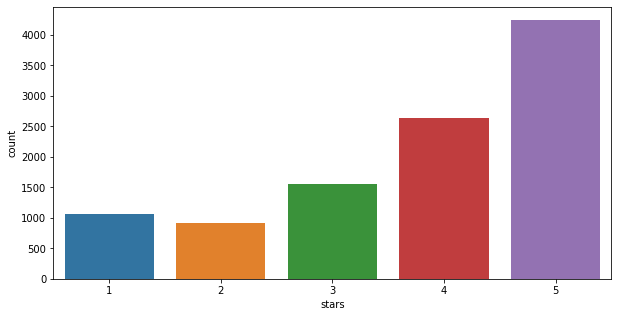

In [128]:
plt.figure(figsize=(10,5))
sns.countplot(df['stars']);

# Data Cleaning

**NLP projesi adımları**

1-Bütün cümleler küçük harfe çevir.

2-Noktalama işaretleri kaldır.

3-Rakamları kaldır.

4-Satır sonu,\n enter a basılmışsa \r

5-Stop words(gereksiz kelimeler) leri kaldır.(am/is/are gibi)

6-Tokenize işlemini yap.

7-Lemma ve stemma uygula(ekleri kaldırıp kökleri buluyoruz)

8-Vectorize et.(kelimeleri rakamlara çevir.)

9-Sentiment analizi

Yazılan şey olumlu? olumsuz? nötr? (3 seçenek olduğundan MultinominalNB kullanıllır.)


In [129]:
df.text

0        After getting food poisoning at the Palms hote...
1        "A feast worthy of Gods"\n\nBaccarnal Buffet i...
2        The crab legs are better than the ones at Wick...
3        Not worth it! Too salty food and expensive! Th...
4        I would give this infinite stars if I could. M...
                               ...                        
10412    Best buffet ever! Irma was great, served us be...
10413    Hollllllyyyy moleyyyy! \n\nThis buffet was one...
10414    The selection is amazing and all the food is e...
10415    One of the best buffets I've had in Vegas. My ...
10416    I got a chance to go to the Bacchanal Buffett ...
Name: text, Length: 10417, dtype: object

In [130]:
df['text']=df['text'].str.lower()

In [131]:
df['text']=df['text'].str.replace('[^\w\s]','')

In [132]:
df['text']=df['text'].str.replace('\d+','')

In [133]:
df['text']=df['text'].str.replace('\n',' ').replace('\r','')

In [134]:
df.loc[(df['stars']==1)|(df['stars']==2),'sentiment']='negative'
df.loc[(df['stars']==3),'sentiment']='neutral'
df.loc[(df['stars']==4)|(df['stars']==5),'sentiment']='positive'

In [135]:
df=df[['stars','sentiment','text']]
df

,stars,sentiment,text
0,5,positive,after getting food poisoning at the palms hote...
1,4,positive,a feast worthy of gods baccarnal buffet in ca...
2,4,positive,the crab legs are better than the ones at wick...
3,1,negative,not worth it too salty food and expensive this...
4,5,positive,i would give this infinite stars if i could my...
...,...,...,...
10412,5,positive,best buffet ever irma was great served us bett...
10413,4,positive,hollllllyyyy moleyyyy this buffet was one fo...
10414,5,positive,the selection is amazing and all the food is e...
10415,4,positive,one of the best buffets ive had in vegas my on...


In [136]:
df['language']=df['text'].apply(detect)  #ingilizce yorumları aldım.
df=df[df['language']=='en']

In [137]:
df.shape  #yeni veri seti #10417 den 10375 e düştü yorum sayısı.

(10373, 4)

In [138]:
df

,stars,sentiment,text,language
0,5,positive,after getting food poisoning at the palms hote...,en
1,4,positive,a feast worthy of gods baccarnal buffet in ca...,en
2,4,positive,the crab legs are better than the ones at wick...,en
3,1,negative,not worth it too salty food and expensive this...,en
4,5,positive,i would give this infinite stars if i could my...,en
...,...,...,...,...
10412,5,positive,best buffet ever irma was great served us bett...,en
10413,4,positive,hollllllyyyy moleyyyy this buffet was one fo...,en
10414,5,positive,the selection is amazing and all the food is e...,en
10415,4,positive,one of the best buffets ive had in vegas my on...,en


In [139]:
df[['polarity','subjectivity']]=df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [140]:
df

,stars,sentiment,text,language,polarity,subjectivity
0,5,positive,after getting food poisoning at the palms hote...,en,0.367452,0.605702
1,4,positive,a feast worthy of gods baccarnal buffet in ca...,en,0.219409,0.537292
2,4,positive,the crab legs are better than the ones at wick...,en,-0.134722,0.731944
3,1,negative,not worth it too salty food and expensive this...,en,-0.325000,0.400000
4,5,positive,i would give this infinite stars if i could my...,en,0.362500,0.725000
...,...,...,...,...,...,...
10412,5,positive,best buffet ever irma was great served us bett...,en,0.543750,0.481250
10413,4,positive,hollllllyyyy moleyyyy this buffet was one fo...,en,0.210101,0.586869
10414,5,positive,the selection is amazing and all the food is e...,en,0.480000,0.630000
10415,4,positive,one of the best buffets ive had in vegas my on...,en,0.185185,0.533333


In [141]:
df.sentiment.value_counts()

positive    6852
negative    1964
neutral     1557
Name: sentiment, dtype: int64

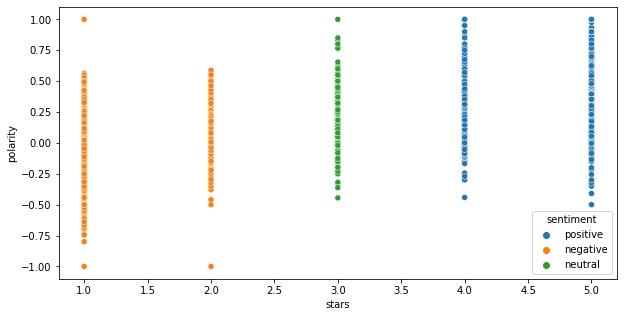

In [142]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.stars,y=df.polarity,hue=df.sentiment);

# Word Clouds

In [143]:
text1=df[df["stars"]==3]
text2=df[(df["stars"]==4)|(df["stars"]==5)] 
text3=df[(df["stars"]==1)|(df["stars"]==2)] 

In [144]:
a=str(text1.text)
b=str(text2.text)
c=str(text3.text)

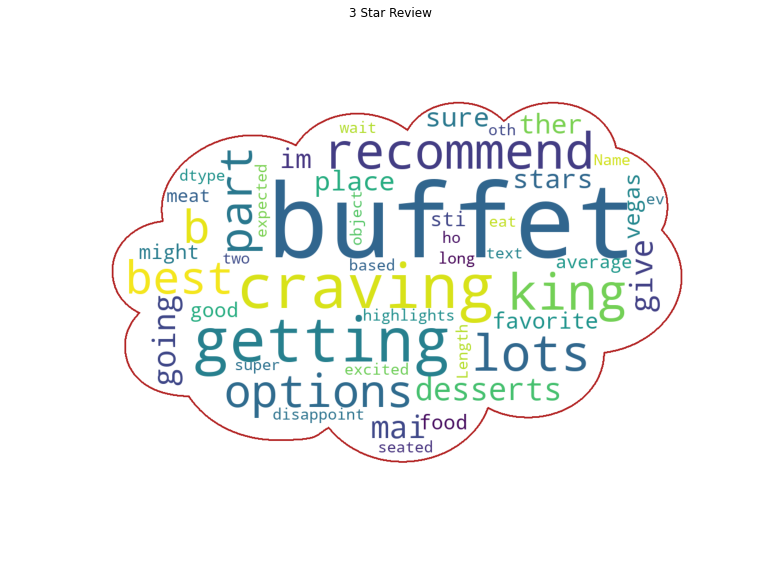

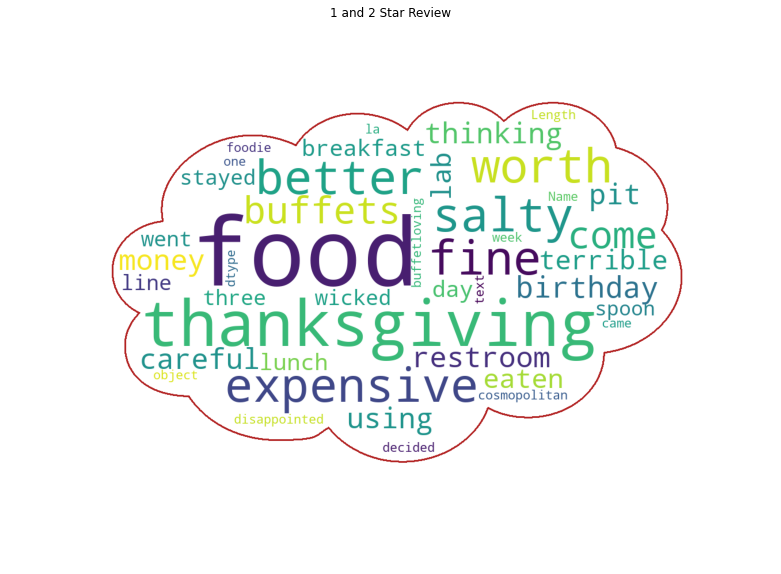

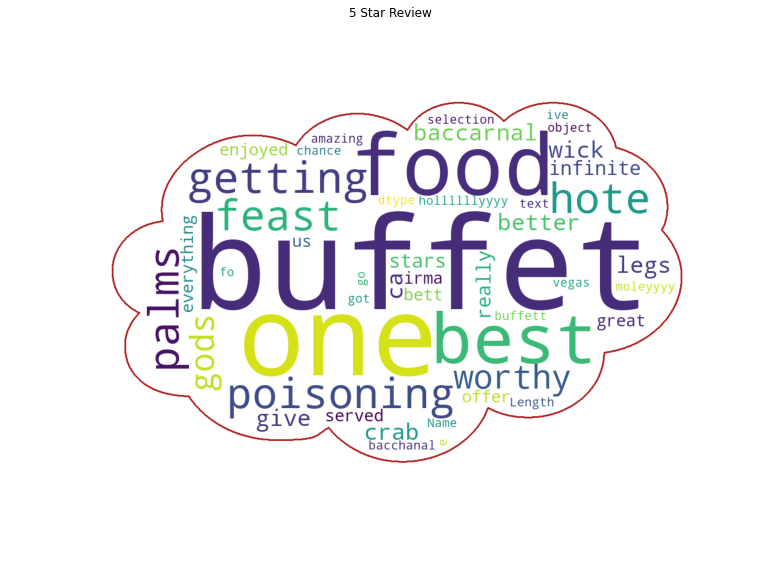

In [145]:
wine_mask = np.array(Image.open("cloud.png"))
wc = WordCloud(background_color="white", max_words=250, mask=wine_mask,
                contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(a)

# store to file
wc.to_file("cloud3.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc)
plt.axis("off")
plt.title('3 Star Review')
plt.show()


# Generate a wordcloud
wc.generate(c)

# store to file
wc.to_file("cloud1.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc)
plt.axis("off")
plt.title('1 and 2 Star Review')
plt.show()

# Generate a wordcloud
wc.generate(b)

# store to file
wc.to_file("cloud5.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc)
plt.axis("off")
plt.title('5 Star Review')
plt.show()

# CountVectorizer and CountVectorizer with Ngram

In [90]:
x=df.text
y=df.sentiment

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [92]:
#Vectorize process convert words to numbers
vec=CountVectorizer(stop_words='english')
x_train_vec=vec.fit_transform(x_train)
x_test_vec=vec.transform(x_test)

In [ ]:
pd.DataFrame(x_train_vec.toarray(),columns=vec.get_feature_names()).sample(10)

In [96]:
#Vectorize with ngram method.This method check over homophonic words of the text.(döndü)
vec2=CountVectorizer(ngram_range=(1,2),stop_words='english',binary=True)
x_train_vec2=vec2.fit_transform(x_train)
x_test_vec2=vec2.transform(x_test)


# **Models**


In [97]:
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
]

cvec_col=['Classifier','Methods','Accuracy','Precision','F1','Recall']
cvec=pd.DataFrame(columns=cvec_col)

for i in classifiers:
    pred=i.fit(x_train_vec,y_train).predict(x_test_vec)
    name = i.__class__.__name__ #(adds model names)
    
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred,average='weighted')
    f1=f1_score(y_test,pred,average='weighted')
    recall=recall_score(y_test,pred,average='weighted')

    cvec_entry=pd.DataFrame([[name,'CountVectorizer',accuracy*100,precision*100,f1*100,recall*100]],columns=cvec_col)
    cvec=cvec.append(cvec_entry)

cvec

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,CountVectorizer,78.220366,77.017337,77.523220,78.220366
0,KNeighborsClassifier,CountVectorizer,65.852875,57.716474,59.032932,65.852875
0,DecisionTreeClassifier,CountVectorizer,65.306778,64.171330,64.701301,65.306778
0,RandomForestClassifier,CountVectorizer,71.538709,68.221866,63.529201,71.538709
0,AdaBoostClassifier,CountVectorizer,75.232894,71.776189,72.365720,75.232894
0,GradientBoostingClassifier,CountVectorizer,74.590427,71.577629,70.222289,74.590427
0,MultinomialNB,CountVectorizer,77.256666,73.345288,73.490046,77.256666
0,BernoulliNB,CountVectorizer,69.868294,67.528370,66.055419,69.868294


In [99]:
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
]

cvec2_col=['Classifier','Methods','Accuracy','Precision','F1','Recall']
cvec2=pd.DataFrame(columns=cvec2_col)

for i in classifiers:
    pred2=i.fit(x_train_vec2,y_train).predict(x_test_vec2)
    name = i.__class__.__name__
    
    accuracy=accuracy_score(y_test,pred2)
    precision=precision_score(y_test,pred2,average='weighted')
    f1=f1_score(y_test,pred2,average='weighted')
    recall=recall_score(y_test,pred2,average='weighted')

    cvec2_entry=pd.DataFrame([[name,'N-grams',accuracy*100,precision*100,f1*100,recall*100]],columns=cvec2_col)
    cvec2=cvec2.append(cvec2_entry)

cvec2

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,N-grams,80.340508,78.251321,78.737145,80.340508
0,KNeighborsClassifier,N-grams,64.310954,52.236379,53.256035,64.310954
0,DecisionTreeClassifier,N-grams,67.330549,65.487836,66.268934,67.330549
0,RandomForestClassifier,N-grams,67.748153,68.519279,57.446538,67.748153
0,AdaBoostClassifier,N-grams,74.686797,70.853285,71.604406,74.686797
0,GradientBoostingClassifier,N-grams,74.494057,71.383006,69.955565,74.494057
0,MultinomialNB,N-grams,68.358497,66.630843,58.471467,68.358497
0,BernoulliNB,N-grams,64.535818,58.239962,51.014540,64.535818


# TF-IDF and TF-IDF with Ngram

In [103]:
tf1=TfidfVectorizer(stop_words='english')
x_train_tf1=tf1.fit_transform(x_train)
x_test_tf1=tf1.transform(x_test)

tf2=TfidfVectorizer(ngram_range=(1,2),stop_words='english',binary=True)
x_train_tf2=tf2.fit_transform(x_train)
x_test_tf2=tf2.transform(x_test)

In [104]:
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
]

tf1_col=['Classifier','Methods','Accuracy','Precision','F1','Recall']
tf1=pd.DataFrame(columns=tf1_col)

for i in classifiers:
    pred_tf1=i.fit(x_train_tf1,y_train).predict(x_test_tf1)
    name = i.__class__.__name__
    
    accuracy=accuracy_score(y_test,pred_tf1)
    precision=precision_score(y_test,pred_tf1,average='weighted')
    f1=f1_score(y_test,pred_tf1,average='weighted')
    recall=recall_score(y_test,pred_tf1,average='weighted')

    tf1_entry=pd.DataFrame([[name,'T-IDF',accuracy*100,precision*100,f1*100,recall*100]],columns=tf1_col)
    tf1=tf1.append(tf1_entry)

tf1

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,T-IDF,79.955027,77.331892,77.390359,79.955027
0,KNeighborsClassifier,T-IDF,69.611307,65.039523,66.280167,69.611307
0,DecisionTreeClassifier,T-IDF,65.403148,64.508773,64.930277,65.403148
0,RandomForestClassifier,T-IDF,70.928365,71.788131,62.731477,70.928365
0,AdaBoostClassifier,T-IDF,74.975907,71.915812,72.596977,74.975907
0,GradientBoostingClassifier,T-IDF,74.783167,72.417485,70.692622,74.783167
0,MultinomialNB,T-IDF,64.600064,61.564107,51.064351,64.600064
0,BernoulliNB,T-IDF,69.868294,67.528370,66.055419,69.868294


# **Models**

In [105]:
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
]

tf2_col=['Classifier','Methods','Accuracy','Precision','F1','Recall']
tf2=pd.DataFrame(columns=tf2_col)

for i in classifiers:
    pred_tf2=i.fit(x_train_tf2,y_train).predict(x_test_tf2)
    name = i.__class__.__name__
    
    accuracy=accuracy_score(y_test,pred_tf2)
    precision=precision_score(y_test,pred_tf2,average='weighted')
    f1=f1_score(y_test,pred_tf2,average='weighted')
    recall=recall_score(y_test,pred_tf2,average='weighted')

    tf2_entry=pd.DataFrame([[name,'T-IDF/N-gram',accuracy*100,precision*100,f1*100,recall*100]],columns=tf2_col)
    tf2=tf2.append(tf2_entry)

tf2

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,T-IDF/N-gram,77.674269,76.080275,73.020823,77.674269
0,KNeighborsClassifier,T-IDF/N-gram,71.602955,66.736469,67.065080,71.602955
0,DecisionTreeClassifier,T-IDF/N-gram,63.893350,63.433245,63.657462,63.893350
0,RandomForestClassifier,T-IDF/N-gram,68.904594,71.781175,59.392413,68.904594
0,AdaBoostClassifier,T-IDF/N-gram,74.301317,70.968888,71.788867,74.301317
0,GradientBoostingClassifier,T-IDF/N-gram,75.618375,73.098365,72.111103,75.618375
0,MultinomialNB,T-IDF/N-gram,64.246707,41.276394,50.261457,64.246707
0,BernoulliNB,T-IDF/N-gram,64.535818,58.239962,51.014540,64.535818


# **All Results**

In [116]:
result=pd.concat([cvec,cvec2,tf1,tf2],axis=0)
result

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,CountVectorizer,78.220366,77.017337,77.523220,78.220366
0,KNeighborsClassifier,CountVectorizer,65.852875,57.716474,59.032932,65.852875
0,DecisionTreeClassifier,CountVectorizer,65.306778,64.171330,64.701301,65.306778
0,RandomForestClassifier,CountVectorizer,71.538709,68.221866,63.529201,71.538709
0,AdaBoostClassifier,CountVectorizer,75.232894,71.776189,72.365720,75.232894
0,GradientBoostingClassifier,CountVectorizer,74.590427,71.577629,70.222289,74.590427
0,MultinomialNB,CountVectorizer,77.256666,73.345288,73.490046,77.256666
0,BernoulliNB,CountVectorizer,69.868294,67.528370,66.055419,69.868294
0,LogisticRegression,N-grams,80.340508,78.251321,78.737145,80.340508
0,KNeighborsClassifier,N-grams,64.310954,52.236379,53.256035,64.310954


In [117]:
result.iloc[8]  #Best

Classifier    LogisticRegression
Methods                  N-grams
Accuracy               80.340508
Precision              78.251321
F1                     78.737145
Recall                 80.340508
Name: 0, dtype: object